Step 1 - Import python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import pandas.util.testing as tm
from scipy import stats
pd.options.mode.chained_assignment = None

Step 2 - Load and read the data file

1.   Upload data file from Google drive and run the notebook in the cloud
2.   Upload data file from local computer and run the notebook in the cloud
3.   Load data file from local computer and run the notebook locally

Step 2 - Option 1 - Upload data file from Google drive

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

In [3]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df=pd.read_table('/content/drive/MyDrive/complete_COVID_samples.tsv')
df

Step 2 - Option 2 - Upload data file from local computer

In [4]:
from google.colab import files 
uploaded = files.upload()

In [5]:
import io

#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table(io.BytesIO(uploaded['complete_COVID_samples.tsv']), sep = '\t')
df

Step 2 - Option 3 - Run the notebook locally (refer here for how to connect to local runtime https://research.google.com/colaboratory/local-runtimes.html)

In [2]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table('../../../downloads/covid_data/complete_COVID_samples.tsv', sep = '\t', low_memory=False)
df

,sample,frequency,templates,amino_acid,rearrangement,v_resolved,d_resolved,j_resolved,age,gender,...,icu_admit,birth_year,blood_type,cmv_at_donation,days_from_last_symptom_to_sample,ethnicity,height_meters,hospitalized,weight_kg,race
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,33,Female,...,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,33,Female,...,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,33,Female,...,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,33,Female,...,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian


Step 3 - Create the standardized format (column content and column names)
1.   Sample name (sample)
2.   Clone frequency (freq)
3.   Clone reads count (#count)
4.   CDR3 amino acid clonotype (cdr3aa)
5.   CDR3 nucleotide (cdr3nt)
6.   V gene (v)
7.   D gene (d)
8.   J gene (j)
9.   Optional - Sample feature (here we use hospitalization as the clinical feature)

In [3]:
#select the columns that are listed above
df = df[['sample','frequency', 'templates', 'amino_acid', 'rearrangement', 'v_resolved', 'd_resolved','j_resolved','hospitalized']]
#rename the columns 
df.columns = ['sample', 'freq' , '#count' , 'cdr3aa' , 'cdr3nt' , 'v' , 'd' , 'j' , 'hospitalization']
df

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,hospitalization
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,True
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,True
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,True
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,True
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,True
...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,False
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,False
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,False
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,False


In [4]:
#create a dataframe with reads count for each sample
df_reads = df.groupby(['sample','hospitalization']).agg({'#count':'sum'}).reset_index().rename(columns={'#count':"count"})

#create a dataframe with clonotype count for each sample
df_diversity = df.groupby(['sample','hospitalization'], sort=False).size().reset_index(name='clonotype_count')

In [5]:
#add clonotype count of each sample as a column to create a new dataframe
df=pd.merge(df, df_diversity, on=['sample','hospitalization'])
df

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,hospitalization,clonotype_count
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,True,218977
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,True,218977
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,True,218977
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,True,218977
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,True,218977
...,...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,False,453526
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,False,453526
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,False,453526
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,False,453526


Diversity analysis 1 - Shannon-Wiener index [shannon_wiener_index]

In [6]:
#calculation step 1
df['shannon_index'] = -(df['freq']*np.log(df['freq']))

#calculation step 2
df_shannon= df.groupby(['sample','hospitalization']).agg({'shannon_index':'sum'}).reset_index().rename(columns={'':"shannon_index"})

#calculation step 3, Shannon-Wienex index is shown in the shannon_wiener_index column
df_shannon['shannon_wiener_index'] = np.exp(df_shannon['shannon_index'])
df_shannon_index = df_shannon[['sample', 'hospitalization','shannon_wiener_index']]

Diversity analysis 2 - Normalized Shannon-Wiener index [normalized_shannon_wiener_index]

In [7]:
#calculation step 1 - merge df_shannon and df_diversity (which contains clonotype counts)
df_shannon=pd.merge(df_shannon, df_diversity, on=['sample','hospitalization'])

#calculation step 2 - calculate normalized Shannon-Wienex index, it is shown in the normalized_shannon_wiener_index column
df_shannon['normalized_shannon_wiener_index'] = df_shannon['shannon_index']/np.log(df_shannon['clonotype_count'])
df_norm_shannon = df_shannon[['sample', 'hospitalization','shannon_wiener_index','normalized_shannon_wiener_index']]

Diversity analysis 3 - Inverse Simpson index [inverse_simpson_index]

In [8]:
#calculation step 1
df['simpson_index'] = (df['freq']**2)

#calculation step 2
df_simpson= df.groupby(['sample','hospitalization']).agg({'simpson_index':'sum'}).reset_index().rename(columns={'':"simpson_index"})

#calculation step 3, Inverse Simpson index is shown in the inverse_simpson_index column
df_simpson['inverse_simpson_index'] = 1/df_simpson['simpson_index']

Diversity analysis 4 - Gini Simpson index [gini_simpson_index]


In [9]:
df_simpson['gini_simpson_index'] = 1-df_simpson['simpson_index']

Diversity analysis 5 - D50 index [D50_index]


In [10]:
#create an empty dataframe for storing results
df_D50 = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    #store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample]

    #sort the sample clonotypes by frequency in descending order
    df_temp = df_temp.sort_values(by='freq', ascending=False)

    #create a column to store the order
    df_temp['clonotype_number'] = np.arange(df_temp.shape[0])+1

    #compute and store the cumulative sum of the frequencies
    df_temp['accum_freq'] = df_temp['freq'].cumsum()

    #find out the first accumulated frequency that is above 50%
    df_temp = df_temp.loc[(df_temp['accum_freq']>=0.5) & (df_temp['accum_freq']<=0.6)]
    df_temp = df_temp.head(1)

    #calculate D50 index and store in the result dataframe
    df_temp = df_temp.head(1)
    df_temp['D50_index'] = df_temp['clonotype_number']/df_temp['clonotype_count']*100
    df_D50 = pd.concat([df_D50, df_temp])
    
df_D50 = df_D50[['sample', 'hospitalization', 'D50_index']]

Diversity analysis 6 - Chao1 estimate [chao1] and standard deviation [chao1_SD]







In [11]:
#create an empty dataframe for storing results
df_chao1 = pd.DataFrame()

#get the columns needed for calculation from df
df1 = df[['sample','#count','clonotype_count','hospitalization']]

#create a list of the sample names
samples = set(df1['sample'])

for sample in samples:

    #store the rows related to the sample
    df_temp = df1.loc[df1['sample'] == sample]
  
    #count singleton in the sample
    singleton = len(df_temp.loc[df_temp['#count'] == 1])

    #count doubleton in the sample
    doubleton = len(df_temp.loc[df_temp['#count'] == 2])

    #calculate Chao1 estimate 
    chao1 = int(df_temp['clonotype_count'].values[0]) + ((singleton * (singleton-1))/(2*(doubleton+1)))
    df_temp['chao1'] = chao1
 
    #calculate Chao1 estimate standard deviation
    step1 = 1/4*((singleton/doubleton)**4)
    step2 = (singleton/doubleton)**3
    step3 = 1/2*((singleton/doubleton)**2)
    step4 = doubleton * (step1+step2+step3)
    df_temp['chao1_SD'] = step4**(1/2)

    #store the results in the result dataframe
    df_chao1 = pd.concat([df_chao1,df_temp],axis=0,sort=False)
    
    #remove the duplicates results in the result dataframe
    df_chao1 = df_chao1[['sample','hospitalization', 'chao1', 'chao1_SD']]
    df_chao1 = df_chao1.drop_duplicates(subset=['sample'], keep='first')

Diversity analysis 7 - Gini coefficient [gini_coefficient]

In [12]:
#create an empty dataframe for storing results
df_gini = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    #store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample]

    def gini(list_of_values):
        sorted_list = sorted(list_of_values)
        height, area = 0, 0
        for value in sorted_list:
            height += value
            area += height - value / 2.
        fair_area = height * len(list_of_values) / 2.
        return (fair_area - area) / fair_area
  
    #calculate gini coefficient
    df_temp['gini_coefficient']=gini(df_temp['freq'])

    #store the results in the result dataframe
    df_gini = pd.concat([df_gini, df_temp],sort=False)

    #remove the duplicates results in the result dataframe
    df_gini = df_gini[['sample', 'hospitalization', 'gini_coefficient']]
    df_gini = df_gini.drop_duplicates(subset=['sample'], keep='first')

Diversity analysis 8.1 - Summary table for the diversity analysis

In [13]:
#create a dataframe that combines all the diversity analysis 
dfs = [df_norm_shannon, df_simpson, df_D50, df_chao1, df_gini]

df_combined = pd.merge(dfs[0], dfs[1], left_on=['sample','hospitalization'], right_on=['sample','hospitalization'], how='outer')
for d in dfs[2:]:
    df_combined = pd.merge(df_combined, d, left_on=['sample','hospitalization'], right_on=['sample','hospitalization'], how='outer')

df_combined

,sample,hospitalization,shannon_wiener_index,normalized_shannon_wiener_index,simpson_index,inverse_simpson_index,gini_simpson_index,D50_index,chao1,chao1_SD,gini_coefficient
0,1132289BW_TCRB,False,25380.431995,0.789733,0.000049,20566.310911,0.999951,41.429316,2.084775e+06,11410.373284,0.319436
1,1222568BW_TCRB,False,13023.935151,0.746544,0.000143,7004.584037,0.999857,34.491398,1.502319e+06,8096.333443,0.412047
2,1337122BW_TCRB,False,21388.860050,0.764155,0.003713,269.338388,0.996287,36.383654,2.682283e+06,13306.917361,0.329197
3,1445BW_TCRB,False,14847.682803,0.734977,0.001507,663.542016,0.998493,25.637689,2.569078e+06,12316.618071,0.439525
4,1564208BW_TCRB,False,20020.296022,0.774762,0.000092,10895.432559,0.999908,36.576703,1.703006e+06,8928.384316,0.370510
5,1566265BW_TCRB,False,16680.493567,0.746421,0.000581,1720.624843,0.999419,33.769619,2.662749e+06,13646.111790,0.391194
6,1566319BW_TCRB,False,29025.511045,0.793120,0.000099,10091.303888,0.999901,43.370035,2.218496e+06,11090.841381,0.296313
7,1566426BW_TCRB,False,27081.645694,0.813889,0.000087,11551.584040,0.999913,46.192054,1.864089e+06,13030.216495,0.244315
8,1566449BW_TCRB,False,17759.436599,0.763780,0.000156,6416.291221,0.999844,45.114811,1.932286e+06,10429.199800,0.310889
9,1566486BW_TCRB,False,23000.794052,0.762707,0.000746,1340.431932,0.999254,50.560175,4.006665e+06,21730.358941,0.237706


Diversity analysis 8.2 - Statistical analysis of diversity metrics

Diversity 8.2.1 - Mean or median of diversity metrics among groups 
1.   if the dataset is normally distributed, calculate mean
2.   if the dataset is not normally distributed, calculate median

In [14]:
#calculate the mean among two groups
df_combined_mean = pd.DataFrame(columns=['hospitalization'])
for column in df_combined[['shannon_wiener_index','normalized_shannon_wiener_index','inverse_simpson_index','gini_simpson_index','D50_index','chao1','gini_coefficient']]:
    df_temp = df_combined.groupby('hospitalization')[column].mean().reset_index()
    df_combined_mean = pd.merge(df_combined_mean, df_temp, on=['hospitalization'], how='right')
df_combined_mean

,hospitalization,shannon_wiener_index,normalized_shannon_wiener_index,inverse_simpson_index,gini_simpson_index,D50_index,chao1,gini_coefficient
0,False,16668.025925,0.746453,8491.613572,0.998619,33.823858,1.759847e+06,0.384998
1,True,12144.735913,0.726158,2513.737872,0.994756,32.151082,1.443634e+06,0.401635


In [15]:
#calculate the median among two groups
df_combined_median = pd.DataFrame(columns=['hospitalization'])
for column in df_combined[['shannon_wiener_index','normalized_shannon_wiener_index','inverse_simpson_index','gini_simpson_index','D50_index','chao1','gini_coefficient']]:
    df_temp = df_combined.groupby('hospitalization')[column].median().reset_index()
    df_combined_median = pd.merge(df_combined_median, df_temp, on=['hospitalization'], how='right')
df_combined_median

,hospitalization,shannon_wiener_index,normalized_shannon_wiener_index,inverse_simpson_index,gini_simpson_index,D50_index,chao1,gini_coefficient
0,False,16818.878142,0.764617,4103.153484,0.999755,37.003488,1.669349e+06,0.363580
1,True,10671.856917,0.752044,1417.315876,0.999294,39.511525,1.539989e+06,0.352659


Diversity analysis 8.2.2 - Test if the certain diversity metric is normally distributed 
1.   the null hypothesis here is normality 
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)
3.   change the "shannon_wiener_index" to other metrics that you are interested in

In [16]:
x = stats.normaltest(df_combined['shannon_wiener_index'])
x

NormaltestResult(statistic=10.511829542379445, pvalue=0.005216572138781039)

Diversity analysis 8.2.3 - Stat test
1.  if the dataset is normally distributed, use t-test (stats.ttest_ind)

*   change the group1, group2 to the groups/samples that you are interested in
*   change the "shannon_wiener_index" to other metrics that you are interested in

2.  if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in
*   change the "shannon_wiener_index" to other metrics that you are interested in

In [17]:
df_group1 = df_combined[df_combined['hospitalization'] == True]
df_group2 = df_combined[df_combined['hospitalization'] == False]
stats.ranksums(df_group1['shannon_wiener_index'], df_group2['shannon_wiener_index'])

RanksumsResult(statistic=-1.0159443179342347, pvalue=0.30965590304585666)

Plot box plot or violin plot based on the diversity index that you are interested in
1.   change x = 'hospitalization' to the feature that you are interested
2.   change y = 'shannon_wiener_index' to the index that you desire
3.   change the violin plot (sns.violinplot) to the plot type that you are interested in, includes strip plot (sns.stripplot), swarm plot (sns.swarmplot), box plot (sns.boxplot), boxen plot (sns.boxenplot), point plot (sns.pointplot), and bar plot (sns.barplot)
4.   set x label to the feature that you choose
5.   set y label to the index that you choose

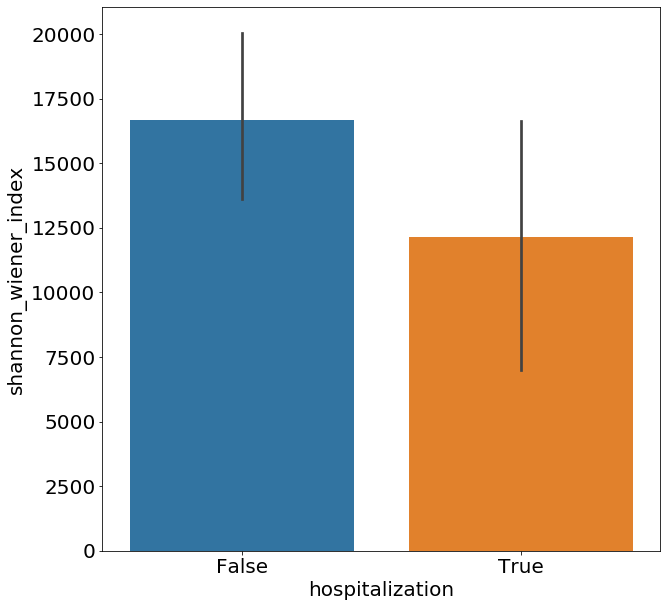

In [18]:
ax = plt.subplots(figsize = (10,10))

ax = sns.barplot(x='hospitalization',y='shannon_wiener_index', data=df_combined)

ax.set_xlabel('hospitalization',fontsize=20)
ax.set_ylabel('shannon_wiener_index',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()